<a href="https://colab.research.google.com/github/aayRJ23/aayRJ23-Image-Edge-Detection-python-IP/blob/main/EdgeDetection_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***FINAL CODE***

Step 1 : Install necessary packages

In [ ]:
!pip install opencv-python
!pip install numpy

Step 2: Import libraries

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Markdown

Step 3 : Function for Edge Detection using Fuzzy Logic

In [ ]:
def edge_detection(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Sobel operator for edge detection
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Fuzzy logic thresholding
    max_gradient = np.max(gradient_magnitude)
    min_gradient = np.min(gradient_magnitude)
    threshold = (max_gradient + min_gradient) / 2
    fuzzy_threshold = 0.5 * (1 + np.tanh((gradient_magnitude - threshold) / (2 * np.std(gradient_magnitude))))
    edge_image = (fuzzy_threshold * 255).astype(np.uint8)

    return edge_image

Main Function

In [ ]:
def main():
    # Read input image
    input_image = cv2.imread('img.jpg')

    if input_image is None:
        print("Error: Could not read the image.")
    else:
        # Perform edge detection
        edges = edge_detection(input_image)

        # Display results with labels
        display(Markdown("<center><h2><b>Original Image</b></h2></center>"))
        cv2_imshow(input_image)

        display(Markdown("<center><h2><b>Performed Edge Detection Image</b></h2></center>"))
        cv2_imshow(edges)

Call the main function

<center><h2><b>Original Image</b></h2></center>

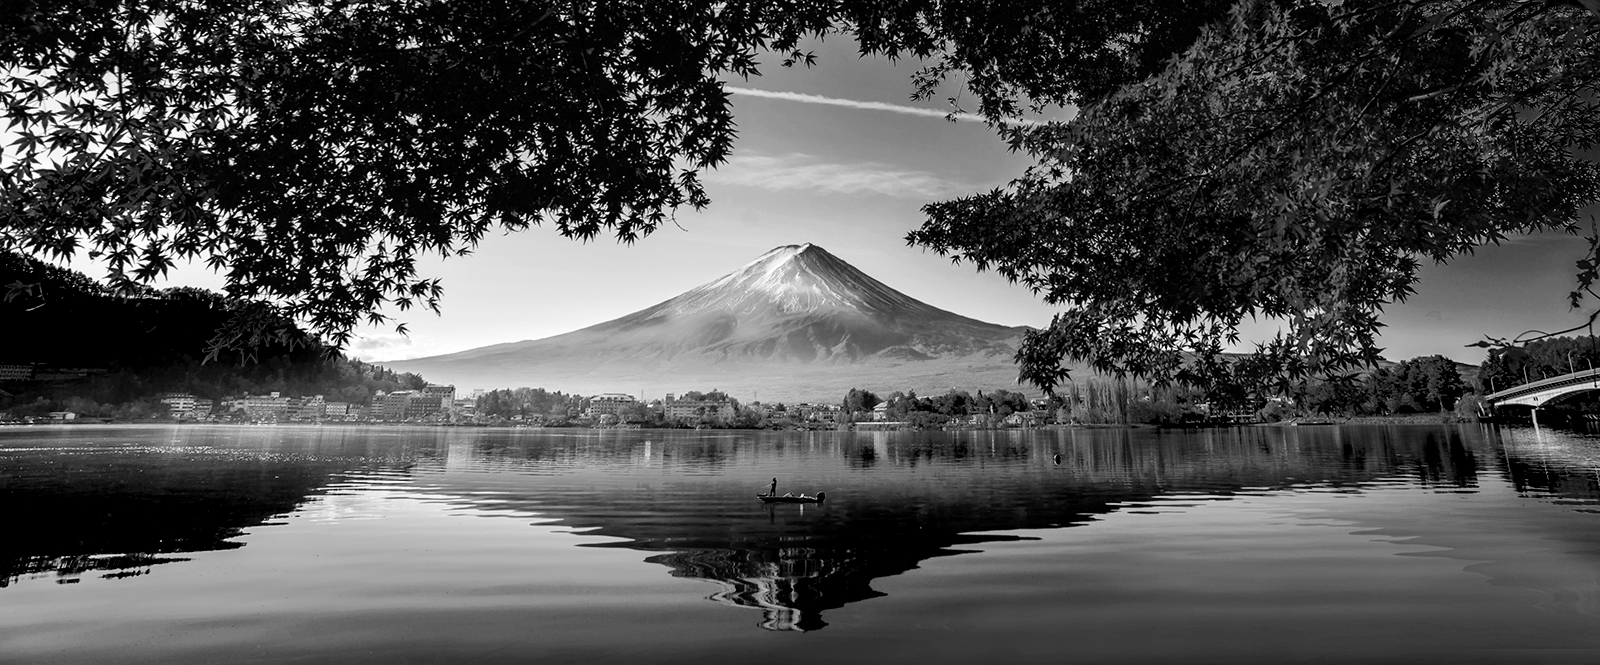

<center><h2><b>Performed Edge Detection Image</b></h2></center>

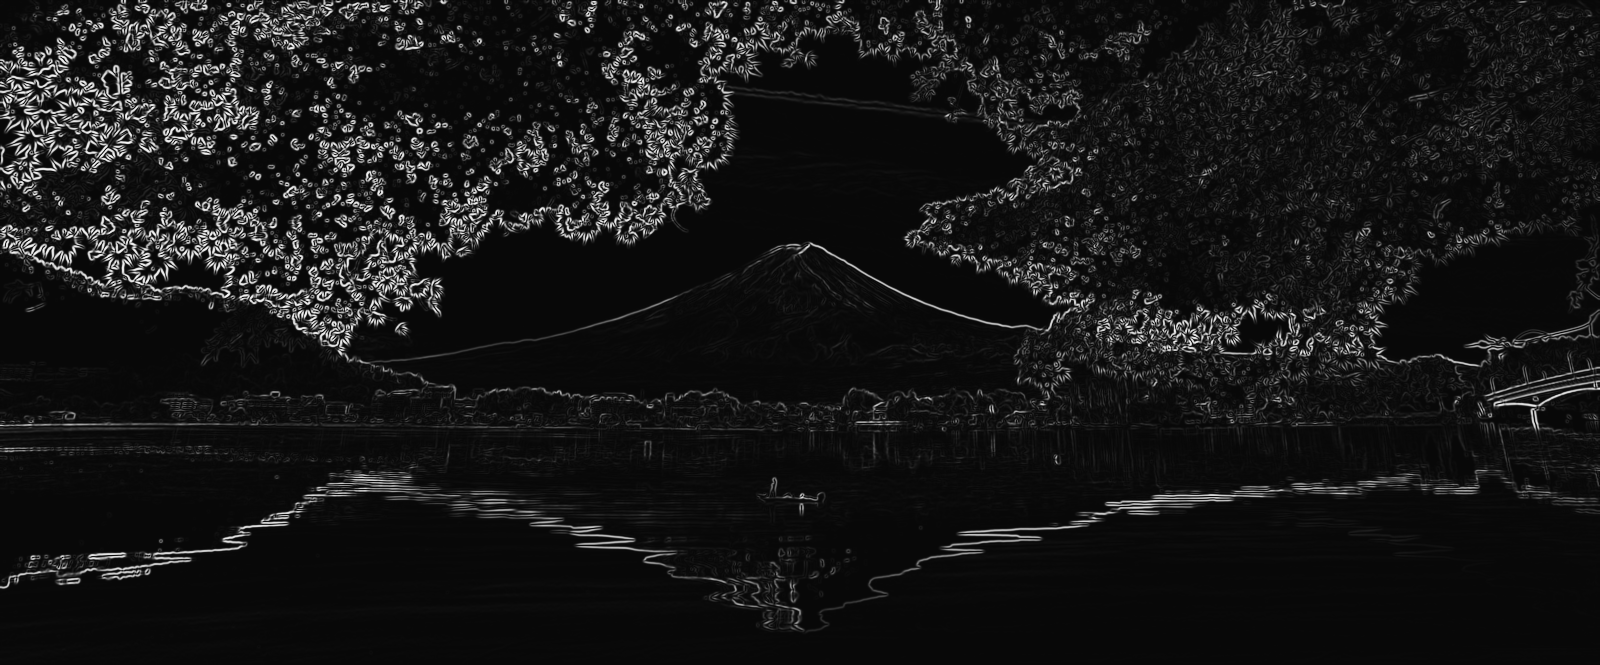

In [ ]:
if __name__ == "__main__":
    main()